In [2]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

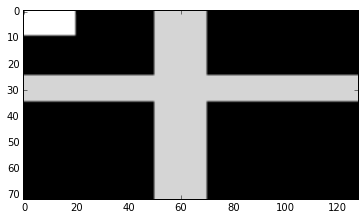

In [3]:
'''
Módulo proc_images.py

''' 

def init (h, w, random=True):
    if random is True:
        return np.random.randint(0, 255, size = h * w).reshape(h, w)
    else:
        return np.zeros(h * w).reshape(h, w)

def show_im(img):
    plt.gray()
    plt.imshow(img)
    
def draw_vertical_bar(img, pos, ancho, intens):
    img[0:img.shape[0], pos:pos + ancho] = intens

def draw_horizontal_bar(img, pos, ancho, intens):
    img[pos:pos+ancho, 0:img.shape[1] ] = intens
    
def draw_rectangle (img, x0, y0, x1, y1, intens):
    img[y0:y1, x0:x1 ] = intens
 
# Tarea 1    
def draw_horizontal_gradient(img, cant_barras, nivel_inicial, nivel_final):
    pass

#Tarea 2
def draw_vertical_gradient(img, cant_barras, nivel_inicial, nivel_final):
    pass

def sum(img1, img2):
    if img1.shape != img2.shape:
        return img1
    img3 =  img1 + img2
    img3.clip(0,255)
    return img3

def borders(im):
    h = im.shape[0]
    w = im.shape[1]
    b = np.zeros((h + 1) * (w + 1)).reshape(h + 1, w + 1)
    c = np.zeros((h + 1) * (w + 1)).reshape(h + 1, w + 1)
    b[1:,1:] = im
    c[:-1,:-1] = im
    im1  = (b - c)[:-1,:-1].clip(0,255)
    im0  = (c - b)[:-1,:-1].clip(0,255)
    return (im1 + im0).clip(0,255)

def simple_blur(im):
    h = im.shape[0]
    w = im.shape[1]
    b = np.zeros((h + 1) * (w + 1)).reshape(h + 1, w + 1)
    c = np.zeros((h + 1) * (w + 1)).reshape(h + 1, w + 1)
    b[1:,1:] = im
    c[:-1,:-1] = im
    im1  = .5 * (b + c)[:-1,:-1].clip(0,255)
    im0  = .5 * (c + b)[:-1,:-1].clip(0,255)
    return (im1 + im0).clip(0,255)
        
if __name__ == "__main__":
    (h, w) = (72, 128)
    img = init (h, w, random=False)
    img2 = init (h, w, random=False)
    draw_vertical_bar(img, 50, 20, 100)
    draw_horizontal_bar(img, 25, 10, 100)
    draw_rectangle(img2, 0,0, 20, 10, 120)
    img = sum(img, img2)
    show_im(img)

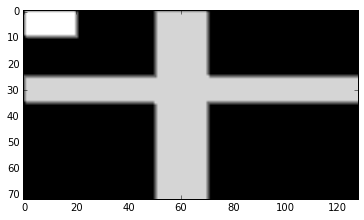

In [4]:
#img = img + 0.5 * (img - simple_blur(img)).clip(0,255)
img = simple_blur(img)
show_im(img)

## Esto es un paso a paso de como hacer el método borders 

How to add an extra column to an numpy array [link](http://stackoverflow.com/questions/8486294/how-to-add-an-extra-column-to-an-numpy-array)

(73, 129)
120.0 -120.0


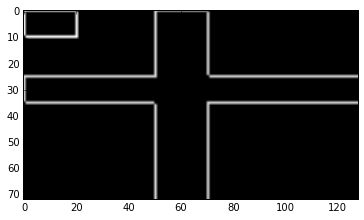

In [32]:
img3.shape
b = np.zeros((img3.shape[0] + 1) * (img3.shape[1] + 1)).reshape(img3.shape[0] + 1, img3.shape[1] + 1)
c = np.zeros((img3.shape[0] + 1) * (img3.shape[1] + 1)).reshape(img3.shape[0] + 1, img3.shape[1] + 1)
b[1:,1:] = img3
c[:-1,:-1] = img3
img4  = b - c
print(img4.shape)
show_im(img4[:-1,:-1].clip(0,255))
print(img4.max(), img4.min())
img5 = c - b 
show_im(img5[:-1,:-1].clip(0,255)+img4[:-1,:-1].clip(0,255))


## Ejemplo de cálculo con lo básico

### Python in Elecrical Engineering: Computing Symmetrical Components. [link](http://my-other-life-as-programmer.blogspot.com.ar/2011/04/python-in-elecrical-engineering.html)

Fasores: vectores rotantes a una velocidad dad por la frecuencia de línea, $V_1$, $V_2$, $V_3$, para cada uno tenemos un módulo y un ángulo de fase.

El cálculo de las componentes simétricas, está dado por:

$E_0 = (\frac {1}{3}) (V_1 + V_2 + V_3)$, 

$E_1 = (\frac {1}{3}) (V_1 + aV_2 + a^2V_3)$,

$E_2 = (\frac {1}{3}) (V_1 + a^2V_2 + aV_3)$,

A es un operador fasor rotado 120°

$a = cos( 2\pi/3) + j sin(2\pi/3) =  e^{i2\pi/3}$



In [3]:
"""
file    symcomp.py
author  Ernesto P. Adorio, Ph.D.
UPDEPP (U.P. Clarkfield)
desc    basic symmetrical components for three phase phasors.
Phasors are tuples of the form (r, phi) where r and phi are the
magnitude(absolute value) and phi is the phase angle.
version 0.0.1 april 20, 2011
"""

#from math  import *
#from cmath import *

import math as mt
import cmath as cm

zTOL = 1.0e-8
DTOR = mt.pi / 180.0
RTOD = 180.0 / mt.pi



ONETWENTYRAD = 120 * DTOR
_a_  = cm.rect(1, 120 * mt.pi/ 180.0)
_a2_ = _a_.conjugate()

def dtor(degree):
    """
    Converts degree to radians.
    """
    return degree * DTOR

def rtod(radian):
    """
    Converts radians to degree.
    """
    return radian * RTOD

def  z2pair(z):
    """
    returns z in pair form.
    """ 
    return (z.real, z.imag)

def  pair2z(re, im):
    """
    returns a complex number from the components. 
    """
    return re + im*1j

def  polar2pair(v):
    """
    (r, phi) to (re, im) pair form.
    """
    # Special checking for zero imaginaries!
    # some computations result in an additional 0j
    r, phi = v
    if type(r) == type(1j):
        r =r.real
    if type(phi) == type(1j):
         phi = phi.real

    z = cm.rect(r, phi)
    return z.real, z.imag

def  pair2polar(re, im):
    return polar(pair2z(re,im))

def  zround(v):
    if abs(v[0]) < zTOL:
        return (0.0, 0.0)

def  a(v):
     """
     Applies the a operator to a phasor v in polar form.
     It adds a 120 degree to the phase of the phasor v.
     if v is real, the angle is zero.
     """
     if type(v) != type((0,0)):
        v = (v, 0)
     r     = abs(v[0])
     theta = v[1]

     newangle = theta + ONETWENTYRAD
     return (r * cos(newangle), r * sin(newangle))

def a2(v):
     """
     Applies the a operator to a phasor v in polar form.
     It adds a 120 degree to the phase of the phasor v.
     """
     if type(v) != type((0,0)):
        v = (v, 0)
     r     = abs(v[0])
     theta = v[1]

     newangle = theta + 2*ONETWENTYRAD
     return (r * cos(newangle), r * sin(newangle))


def  symcomp(v1, v2, v3):
     """
     Returns the symmetrical components of the three phasors v1, v2, v3
     which are in tuple (r, theta) form.
     """
     #Convert first to complex rectangular form.
     v1z  = cm.rect(v1[0], v1[1])
     v2z  = cm.rect(v2[0], v2[1])
     v3z  = cm.rect(v3[0], v3[1]) 

     av2  = _a_ * v2z
     a2v2 = _a2_ * v2z
     av3  = _a_* v3z
     a2v3 = _a2_* v3z

     #Null sequence  component.
     E0 = cm.polar((v1z.real+ v2z.real+  v3z.real)/3.0 +  (v1z.imag+ v2z.imag+ v3z.imag)/3.0*1j)

     #Positive sequence component.
     E1 = cm.polar((v1z.real + av2.real +  a2v3.real)/3.0+ (v1z.imag+ av2.imag+ a2v3.imag)/3.0*1j)

     #Negative sequence component.
     E2 = cm.polar((v1z.real + a2v2.real +  av3.real)/3.0+ (v1z.imag+ a2v2.imag+ av3.imag)/3.0*1j)

     return (E0, E1, E2)


def  symcompz(v1, v2, v3):
     """
     Returns the symmetrical components of the three phasors v1, v2, v3
     which are in tuple (r, theta) form.
     """
     av2  = _a_ * v2
     a2v2 = _a2_ * v2
     av3  = _a_* v3
     a2v3 = _a2_* v3

     #Null sequence  component.
     E0 = polar((v1.real+ v2.real+  v3.real)/3.0 +  (v1.imag+ v2.imag+ v3.imag)/3.0*1j)

     #Positive sequence component.
     E1 = polar((v1.real + av2.real +  a2v3.real)/3.0+ (v1.imag+ av2.imag+ a2v3.imag)/3.0*1j)

     #Negative sequence component.
     E2 = polar((v1.real + a2v2.real +  av3.real)/3.0+ (v1.imag+ a2v2.imag+ av3.imag)/3.0*1j)

     return (E0, E1, E2)

def  symcomp2phasors(E0, E1, E2):
     """
     Recreates the phasors form the symmetrical components.
     """
     V1 = cm.polar(cm.rect(E0[0], E0[1]) + cm.rect(E1[0], E1[1]) + cm.rect(E2[0], E2[1]))
     V2 = cm.polar(cm.rect(E0[0], E0[1]) + _a2_* cm.rect(E1[0], E1[1]) + _a_ *cm.rect(E2[0], E2[1]))
     V3 = cm.polar(cm.rect(E0[0], E0[1]) + _a_* cm.rect(E1[0], E1[1]) + _a2_ * cm.rect(E2[0], E2[1]))
     return V1, V2, V3


if __name__ == "__main__":
   #extreme cases.
   I1 = cm.polar(10)
   I2 = cm.polar(0)
   I3 = cm.polar(0)
   print (symcomp(I1, I2, I3))
  
  

   #extreme cases, balanced system.
   i1 = 1
   i2 = -0.5 + mt.sqrt(3)/2.0 * 1j
   i3 = -0.5 - mt.sqrt(3)/2.0 * 1j

   I1 = cm.polar(i1) 
   I2 = cm.polar(i2)
   I3 = cm.polar(i3)
   E0, E1, E2 = symcomp(I1, I2, I3)   
   print ("original phasors=", I1, I2, I3)
   print ("symmetrical components:", E0, E1, E2)
   phasors = symcomp2phasors(E0, E1, E2)
   print ("recovered phasors:", phasors)
   #include more here! from published books or other sources.


((3.3333333333333335, 0.0), (3.3333333333333335, 0.0), (3.3333333333333335, 0.0))
original phasors= (1.0, 0.0) (1.0, 2.0943951023931957) (1.0, -2.0943951023931957)
symmetrical components: (1.4802973661668753e-16, 3.141592653589793) (7.401486830834377e-17, 0.0) (1.0, 0.0)
recovered phasors: ((0.9999999999999999, 1.812781560154486e-32), (0.9999999999999999, 2.0943951023931953), (0.9999999999999999, -2.0943951023931953))


### Creamos un módulo symmcomponent.py 

Donde ponemos todas las funciones que sirven para operar sobre fasores

In [3]:
import symmcomponent as sc
import math as mt
import cmath as cm


if __name__ == "__main__":
   #extreme cases.
   I1 = cm.polar(10)
   I2 = cm.polar(0)
   I3 = cm.polar(0)
   print (sc.symcomp(I1, I2, I3))
  
  

   #extreme cases, balanced system.
   i1 = 1
   i2 = -0.5 + mt.sqrt(3)/2.0 * 1j
   i3 = -0.5 - mt.sqrt(3)/2.0 * 1j

   I1 = cm.polar(i1) 
   I2 = cm.polar(i2)
   I3 = cm.polar(i3)
   E0, E1, E2 = sc.symcomp(I1, I2, I3)   
   print ("original phasors=", I1, I2, I3)
   print ("symmetrical components:", E0, E1, E2)
   phasors = sc.symcomp2phasors(E0, E1, E2)
   print ("recovered phasors:", phasors)

((3.3333333333333335, 0.0), (3.3333333333333335, 0.0), (3.3333333333333335, 0.0))
original phasors= (1.0, 0.0) (1.0, 2.0943951023931957) (1.0, -2.0943951023931957)
symmetrical components: (1.4802973661668753e-16, 3.141592653589793) (7.401486830834377e-17, 0.0) (1.0, 0.0)
recovered phasors: ((0.9999999999999999, 1.812781560154486e-32), (0.9999999999999999, 2.0943951023931953), (0.9999999999999999, -2.0943951023931953))
